In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, poisson, binom, norm, multivariate_normal, dirichlet, gamma, beta, expon
#import scipy.stats

/Users/Jinkyoo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Probability distribution

## Discrete distribution

* bernoulli:	A Bernoulli discrete random variable.
* binom:	A binomial discrete random variable.
* poisson:	A Poisson discrete random variable.




### Bernoulli distribution

$$
p(y|\theta) = \begin{cases}
    p & \text{if } y=1 \\\\ 
    1-p & \text{if } y=0
\end{cases}
$$

In [2]:
bernoulli.rvs(0.7, size=100)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0])

/Users/Jinkyoo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


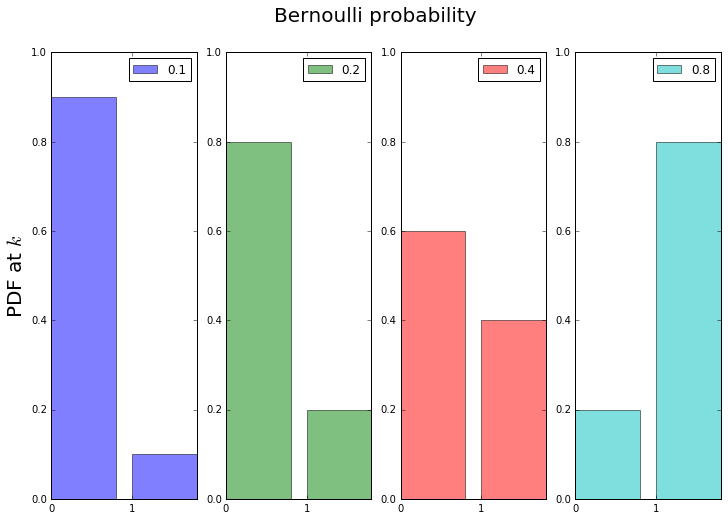

In [3]:
a = np.arange(2)
colors = matplotlib.rcParams['axes.color_cycle']
plt.figure(figsize=(12,8))
for i, p in enumerate([0.1, 0.2, 0.4, 0.8]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, p), label=p, color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(a)
    ax.set_ylim([0,1])
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$", fontsize=20)
plt.suptitle("Bernoulli probability", fontsize=20)


In [4]:
plt.figure(figsize=(12,8))

### Poisson Distribution

Poisson Distribution is defined for all the integer positive number as

$$P(Y=y)=\frac{λ^ye^{−λ}}{y!}, y=0,1,2,   \ldots$$


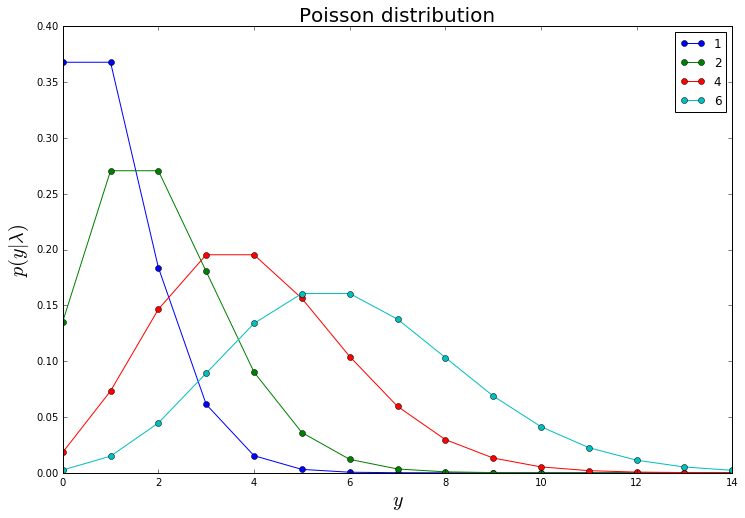

In [5]:
k = np.arange(15)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    #plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution", fontsize=20)
plt.ylabel("$p(y|\lambda)$", fontsize=20)
plt.xlabel("$y$", fontsize=20)

#### Binomial distribution


The binomial distribution is defined as:

$$p(y|n,\theta) = Pr(Y = y) = {n \choose y} \theta^y (1-\theta)^{(n-y)}$$

where 

$${n \choose y} = \frac{n!}{y!(n-y)!}$$

with $y={1, 2, 3, \ldots}$

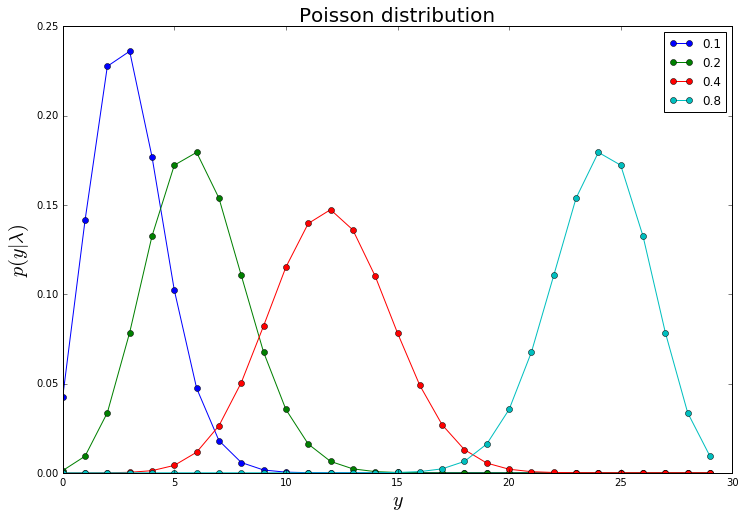

In [6]:
k = np.arange(30)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([.1, .2, .4, .8]):
    plt.plot(k, binom.pmf(k,30, lambda_), '-o', label=lambda_, color=colors[i])
    #plt.fill_between(k, binom.pmf(k,20, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution", fontsize=20)
plt.ylabel("$p(y|\lambda)$", fontsize=20)
plt.xlabel("$y$", fontsize=20)

## Continous Probability Distribution

* $Beta(\alpha,\beta)$:	A beta continuous random variable.
* $Gamma(\alpha,\beta)$:	A gamma continuous random variable.
* $Expon(\lambda)$:	An exponential continuous random variable.
* $Normal(\mu,\sigma^2)$: A normal distribution 
* $Dirichlet(\alpha)$: A Dirichlet distribution

### Beta distribution

The Beta distribution is defined for a variabile rangin between 0 and 1. 

$$
Beta(y| \alpha, \beta) = \frac{1}{B(\alpha, \beta)}y^{\alpha-1}(1 - y)^{\beta-1}, \; with \;  0≤y≤1, \alpha>0, \beta>0
$$

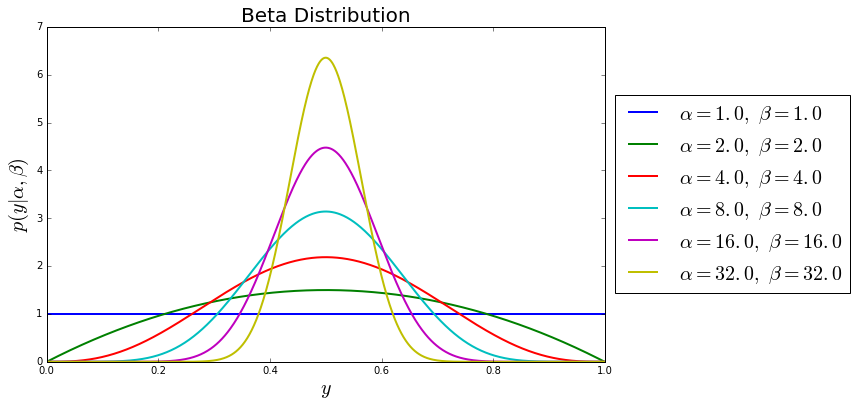

In [7]:
alpha_values = [1, 2, 4, 8,16,32]
beta_values = [1, 2, 4, 8,16,32]
x = np.linspace(1E-6, 1, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

for a, b in zip(alpha_values, beta_values):
    dist = gamma(a, 0, 1./b) #1/b is a scale parameter (wee need to input scale parameter)
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 7)

plt.xlabel('$y$', fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$', fontsize=20)
plt.title('Beta Distribution', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

#plt.legend(loc=1, fontsize=20)
plt.show()

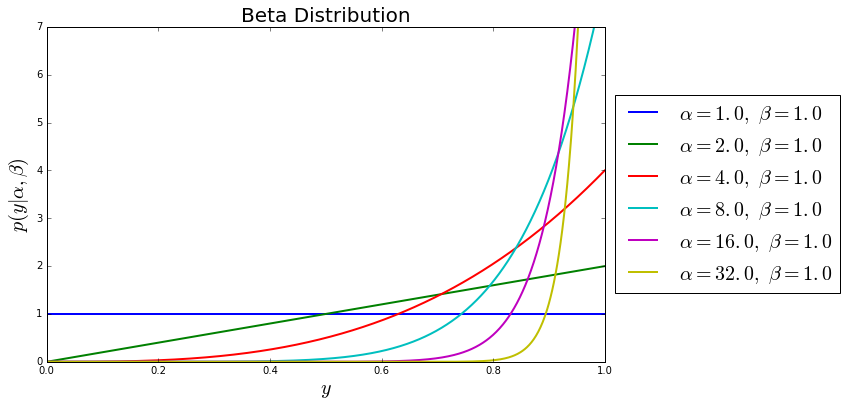

In [8]:
alpha_values = [1, 2, 4, 8,16,32]
beta_values = [1, 1, 1, 1,1,1]
x = np.linspace(1E-6, 1, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

for a, b in zip(alpha_values, beta_values):
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 7)

plt.xlabel('$y$', fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$', fontsize=20)
plt.title('Beta Distribution', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

#plt.legend(loc=1, fontsize=20)
plt.show()

### Gamma distribution

The gamma distribution is defined as
$$
Gamma(y| \alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}  y^{(\alpha-1)}exp(-\beta y), with \, y >= 0, \alpha> 0, \beta > 0
$$
$\beta$ is rate


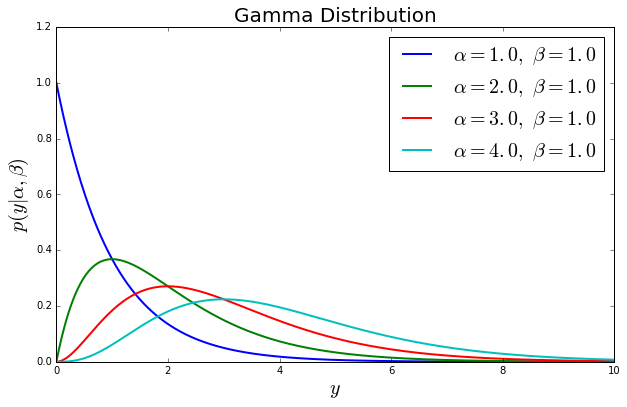

In [9]:
alpha_values = [1, 2, 3, 4]
beta_values = [1,1,1,1]
x = np.linspace(1E-6, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

for a, b in zip(alpha_values, beta_values):
    dist = gamma(a, 0, 1./b) #1/b is a scale parameter (wee need to input scale parameter)
    plt.plot(x, dist.pdf(x), lw=2, 
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 10)
plt.ylim(0, 1.2)

plt.xlabel('$y$', fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$', fontsize=20)
plt.title('Gamma Distribution', fontsize=20)

plt.legend(loc=0, fontsize=20)
plt.show()

# plot the distributions
alpha_values= [3,3,3,3]
beta_values = [1,2,3,4]
x = np.linspace(1E-6, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

for a, b in zip(alpha_values, beta_values):
    dist = gamma(a, 0, 1./b)
    plt.plot(x, dist.pdf(x), lw=2, 
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
plt.xlim(0, 10)
plt.ylim(0, 1.2)

plt.xlabel('$y$',fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$',fontsize=20)
plt.title('Gamma Distribution',fontsize=20)

plt.legend(loc=0,fontsize=20)
plt.show()

Exponential
-----------

The Exponantial probability function is

$$ f_X(x|λ) = λ e^{−λx} , \, x≥0$$

Therefore, the random variable X has an exponential distribution with parameter λ, we say X is exponential and write

$$ X∼Exp(λ) $$

Given a specific λ, the expected value of an exponential random variable is equal to the inverse of λ, that is:

$$ E[X|λ]= \frac{1}{λ} $$

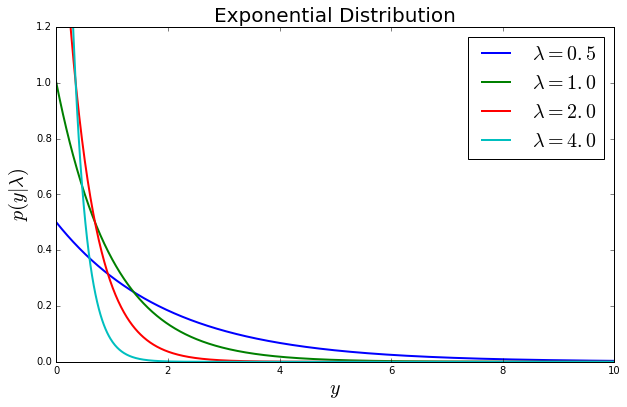

In [11]:
# plot the distributions
lambda_values= [0.5, 1, 2, 4]
x = np.linspace(1E-6, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

for l in lambda_values:
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
             label = "$\lambda = %.1f$"%l)
plt.xlim(0, 10)
plt.ylim(0, 1.2)

plt.xlabel('$y$',fontsize=20)
plt.ylabel(r'$p(y|\lambda)$',fontsize=20)
plt.title('Exponential Distribution',fontsize=20)

plt.legend(loc=0,fontsize=20)
plt.show()

### Multivariate Normal

The multivariate normal distribution is

$$ f_X(x|\mu, \sigma^2) = \frac{1}{\sqrt{(2\pi)^kdet \Sigma}} e^{(-\frac{1}{2}(x-\mu)^T\Sigma^(-1)(x-\mu))} $$

where $\mu$ is the mean vector, $\Sigma$ is the covariance matrix, and $k$ is the dimension of the space whre $x$ takes values.

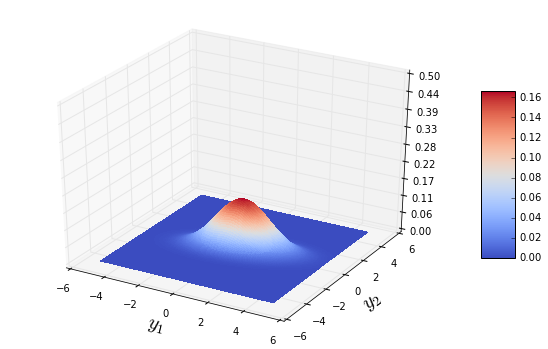

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#fig, ax = plt.subplots(figsize=(10, 6))
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-5:5:.05, -5:5:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
z = rv.pdf(pos)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, .5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('$y_1$',fontsize=20)
plt.ylabel(r'$y_2$',fontsize=20)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Dirichlet Distribution

Dirichlet distribution is defined as

$$
\text{Dirichlet}(y| \alpha) = \frac{\Gamma(\alpha_1+\ldots+\alpha_k)}{\Gamma(\alpha_1)\ldots\Gamma(\alpha_k)}  y_1^{(\alpha_1-1)},\ldots y_k^{(\alpha_k-1)}, \text{with} \, y_i\in [0,1], \Sigma_j^ky_j=1
$$


In [13]:
np.set_printoptions(precision=2)

def stats(scale_factor, alpha=[1, 1, 1], N=10000):
    samples = dirichlet(alpha = scale_factor * np.array(alpha)).rvs(N)
    print "                          alpha:", scale_factor
    print "              element-wise mean:", samples.mean(axis=0)
    print "element-wise standard deviation:", samples.std(axis=0)
    print
    
for scale in [0.1, 1, 10, 100, 1000]:
    stats(scale)

                          alpha: 0.1
              element-wise mean: [ 0.34  0.32  0.34]
element-wise standard deviation: [ 0.42  0.41  0.42]

                          alpha: 1
              element-wise mean: [ 0.34  0.33  0.33]
element-wise standard deviation: [ 0.24  0.24  0.24]

                          alpha: 10
              element-wise mean: [ 0.33  0.33  0.33]
element-wise standard deviation: [ 0.08  0.08  0.08]

                          alpha: 100
              element-wise mean: [ 0.33  0.33  0.33]
element-wise standard deviation: [ 0.03  0.03  0.03]

                          alpha: 1000
              element-wise mean: [ 0.33  0.33  0.33]
element-wise standard deviation: [ 0.01  0.01  0.01]

